<h2>Cleaning and separating the table into two different dataframe to clean it better</h2>

In [103]:
import pandas as pd
import numpy as np
pd.options.display.float_format = "{:,.1f}".format
pd.set_option('display.max_columns', None)

In [104]:
#loading csv data into dataframe

df_raw = pd.read_excel(r'C:\Users\Phillbert Nevin E\Documents\Python\Gudang2Go Technical Test Python\Optimization Plant.xlsx')
df = pd.DataFrame(df_raw)
df

D:\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:81: UserWarning:

Unknown extension is not supported and will be removed



,Case,DEMAND,KOTA,JENIS_ITEM,Unnamed: 4,GUDANG,BIAYA HANDLING @ CARTON,ONGKIR-BDG @ CARTON,ONGKIR-YOGYA @ CARTON,ONGKIR-MLG @ CARTON,ONGKIR-JKT @ CARTON,INDEX_MARGIN AA,INDEX_MARGIN BB,INDEX_MARGIN_CC,Capacity AA,Capacity BB,Capacity CC
0,1,20000,BANDUNG,AA,NaN,PLANT1,1000,2500,"1,500.0","2,000.0","2,000.0","50,000.0","45,000.0","60,000.0","15,000.0","20,000.0","12,000.0"
1,2,12000,BANDUNG,BB,NaN,PLANT2,1100,2400,"1,000.0","2,000.0","2,500.0","50,000.0","50,000.0","70,000.0","22,000.0","15,000.0","15,000.0"
2,3,12000,BANDUNG,CC,NaN,PLANT3,1200,1000,"3,000.0","2,000.0","3,000.0","60,000.0","45,000.0","55,000.0","20,000.0","10,000.0","27,000.0"
3,4,15000,YOGYA,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,11000,YOGYA,BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,10500,YOGYA,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,15000,MALANG,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,8500,MALANG,BB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,9000,MALANG,CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,12000,JAKARTA,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
df.drop('Unnamed: 4', axis=1, inplace = True)

In [106]:
df.columns

Index(['Case', 'DEMAND', 'KOTA', 'JENIS_ITEM', 'GUDANG',
       'BIAYA HANDLING @ CARTON', 'ONGKIR-BDG @ CARTON',
       'ONGKIR-YOGYA @ CARTON', 'ONGKIR-MLG @ CARTON', 'ONGKIR-JKT @ CARTON',
       'INDEX_MARGIN AA', 'INDEX_MARGIN BB', 'INDEX_MARGIN_CC', 'Capacity  AA',
       'Capacity BB', 'Capacity  CC'],
      dtype='object')

In [107]:
separator_index = df.columns.get_loc('GUDANG')

In [108]:
df1 = df.iloc[:, :separator_index].reset_index(drop=True)
df2 = df.iloc[:, separator_index:].reset_index(drop=True)

In [109]:
df1

,Case,DEMAND,KOTA,JENIS_ITEM
0,1,20000,BANDUNG,AA
1,2,12000,BANDUNG,BB
2,3,12000,BANDUNG,CC
3,4,15000,YOGYA,AA
4,5,11000,YOGYA,BB
5,6,10500,YOGYA,CC
6,7,15000,MALANG,AA
7,8,8500,MALANG,BB
8,9,9000,MALANG,CC
9,10,12000,JAKARTA,AA


In [110]:
df1.drop(df1.index[12:], inplace = True)

In [111]:
#rename it for better clarity

case_df = df1.copy()
case_df

,Case,DEMAND,KOTA,JENIS_ITEM
0,1,20000,BANDUNG,AA
1,2,12000,BANDUNG,BB
2,3,12000,BANDUNG,CC
3,4,15000,YOGYA,AA
4,5,11000,YOGYA,BB
5,6,10500,YOGYA,CC
6,7,15000,MALANG,AA
7,8,8500,MALANG,BB
8,9,9000,MALANG,CC
9,10,12000,JAKARTA,AA


In [112]:
#we can sort it by jenis_item so we can categorize case_df easier in the nett margin calculation

case_df.drop('Case', axis=1, inplace=True)

In [113]:
case_df.sort_values(by=['JENIS_ITEM'], inplace=True)
case_df.reset_index(drop=True, inplace=True)

In [114]:
case_df.columns

Index(['DEMAND', 'KOTA', 'JENIS_ITEM'], dtype='object')

In [115]:
#standardizing column data types into float

cols_to_convert = ['DEMAND']
case_df[cols_to_convert] = case_df[cols_to_convert].astype(float)

In [116]:
case_df

,DEMAND,KOTA,JENIS_ITEM
0,"20,000.0",BANDUNG,AA
1,"15,000.0",YOGYA,AA
2,"15,000.0",MALANG,AA
3,"12,000.0",JAKARTA,AA
4,"12,000.0",BANDUNG,BB
5,"11,000.0",YOGYA,BB
6,"8,500.0",MALANG,BB
7,"7,000.0",JAKARTA,BB
8,"12,000.0",BANDUNG,CC
9,"10,500.0",YOGYA,CC


In [117]:
df2

,GUDANG,BIAYA HANDLING @ CARTON,ONGKIR-BDG @ CARTON,ONGKIR-YOGYA @ CARTON,ONGKIR-MLG @ CARTON,ONGKIR-JKT @ CARTON,INDEX_MARGIN AA,INDEX_MARGIN BB,INDEX_MARGIN_CC,Capacity AA,Capacity BB,Capacity CC
0,PLANT1,1000,2500,"1,500.0","2,000.0","2,000.0","50,000.0","45,000.0","60,000.0","15,000.0","20,000.0","12,000.0"
1,PLANT2,1100,2400,"1,000.0","2,000.0","2,500.0","50,000.0","50,000.0","70,000.0","22,000.0","15,000.0","15,000.0"
2,PLANT3,1200,1000,"3,000.0","2,000.0","3,000.0","60,000.0","45,000.0","55,000.0","20,000.0","10,000.0","27,000.0"
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
#drop unused rows

df2.drop(df2.index[3:], inplace = True)

In [119]:
df2

,GUDANG,BIAYA HANDLING @ CARTON,ONGKIR-BDG @ CARTON,ONGKIR-YOGYA @ CARTON,ONGKIR-MLG @ CARTON,ONGKIR-JKT @ CARTON,INDEX_MARGIN AA,INDEX_MARGIN BB,INDEX_MARGIN_CC,Capacity AA,Capacity BB,Capacity CC
0,PLANT1,1000,2500,"1,500.0","2,000.0","2,000.0","50,000.0","45,000.0","60,000.0","15,000.0","20,000.0","12,000.0"
1,PLANT2,1100,2400,"1,000.0","2,000.0","2,500.0","50,000.0","50,000.0","70,000.0","22,000.0","15,000.0","15,000.0"
2,PLANT3,1200,1000,"3,000.0","2,000.0","3,000.0","60,000.0","45,000.0","55,000.0","20,000.0","10,000.0","27,000.0"


In [120]:
#renaming it

lookup_df = df2.copy()

In [121]:
#checking column names, trying to fix any mispelling or double whitespaces

lookup_df.columns

Index(['GUDANG', 'BIAYA HANDLING @ CARTON', 'ONGKIR-BDG @ CARTON',
       'ONGKIR-YOGYA @ CARTON', 'ONGKIR-MLG @ CARTON', 'ONGKIR-JKT @ CARTON',
       'INDEX_MARGIN AA', 'INDEX_MARGIN BB', 'INDEX_MARGIN_CC', 'Capacity  AA',
       'Capacity BB', 'Capacity  CC'],
      dtype='object')

In [122]:
lookup_df.rename(columns={'Capacity  AA': 'Capacity AA', 'Capacity  CC': 'Capacity CC'}, inplace=True)
lookup_df.rename(columns={'ONGKIR-BDG @ CARTON' : 'ONGKIR-BANDUNG @ CARTON', 'ONGKIR-MLG @ CARTON': 'ONGKIR-MALANG @ CARTON', 'ONGKIR-JKT @ CARTON' : 'ONGKIR-JAKARTA @ CARTON'}, inplace=True)

In [123]:
lookup_df.columns

Index(['GUDANG', 'BIAYA HANDLING @ CARTON', 'ONGKIR-BANDUNG @ CARTON',
       'ONGKIR-YOGYA @ CARTON', 'ONGKIR-MALANG @ CARTON',
       'ONGKIR-JAKARTA @ CARTON', 'INDEX_MARGIN AA', 'INDEX_MARGIN BB',
       'INDEX_MARGIN_CC', 'Capacity AA', 'Capacity BB', 'Capacity CC'],
      dtype='object')

In [124]:
lookup_df.columns = lookup_df.columns.str.replace(r'\s+', '_', regex=True)

In [125]:
#standardizing column data types into float

cols_to_convert = ['BIAYA_HANDLING_@_CARTON', 'ONGKIR-BANDUNG_@_CARTON',
       'ONGKIR-YOGYA_@_CARTON', 'ONGKIR-MALANG_@_CARTON',
       'ONGKIR-JAKARTA_@_CARTON', 'INDEX_MARGIN_AA', 'INDEX_MARGIN_BB',
       'INDEX_MARGIN_CC', 'Capacity_AA', 'Capacity_BB', 'Capacity_CC']
lookup_df[cols_to_convert] = lookup_df[cols_to_convert].astype(float)

In [126]:
lookup_df

,GUDANG,BIAYA_HANDLING_@_CARTON,ONGKIR-BANDUNG_@_CARTON,ONGKIR-YOGYA_@_CARTON,ONGKIR-MALANG_@_CARTON,ONGKIR-JAKARTA_@_CARTON,INDEX_MARGIN_AA,INDEX_MARGIN_BB,INDEX_MARGIN_CC,Capacity_AA,Capacity_BB,Capacity_CC
0,PLANT1,"1,000.0","2,500.0","1,500.0","2,000.0","2,000.0","50,000.0","45,000.0","60,000.0","15,000.0","20,000.0","12,000.0"
1,PLANT2,"1,100.0","2,400.0","1,000.0","2,000.0","2,500.0","50,000.0","50,000.0","70,000.0","22,000.0","15,000.0","15,000.0"
2,PLANT3,"1,200.0","1,000.0","3,000.0","2,000.0","3,000.0","60,000.0","45,000.0","55,000.0","20,000.0","10,000.0","27,000.0"


<h2>Creating the calculation optimization for NETT Margin</h2>

<p>First thing to do is to calculate the Single Product NETT Margin. The formula of NETT Margin based on the test is:</p>

<b>Single NETT Margin = Index Margin - (Handling + Shipment)</b>

<p>Then we can calculate the Total NETT Margin using this formula</p>

<b>Total NETT Margin = Single NETT Margin * Demand</b>

<p>Based on that formula, we can create calculation function to calculate the costs, margins and nett margins that looks like:</p>

In [149]:
#create a function to calculate costs, margins, and net margins
def calculate_margins(case_row, lookup_df):
    city = case_row['KOTA']
    item = case_row['JENIS_ITEM']
    demand = case_row['DEMAND']

    costs = []
    single_net_margins = []
    total_net_margins = []
    index_margins = []
    
    #Calculate costs and index margin for each plant
    for _, plant_row in lookup_df.iterrows():
        handling_cost = plant_row['BIAYA_HANDLING_@_CARTON']
        shipment_cost = plant_row[f'ONGKIR-{city.upper()}_@_CARTON']
        total_cost = handling_cost + shipment_cost
        index_margin = plant_row[f'INDEX_MARGIN_{item}']
        
        #inserting the formula needed
        single_net_margin = index_margin - total_cost
        total_net_margin = single_net_margin * demand
        
        costs.append(total_cost)
        single_net_margins.append(single_net_margin)
        total_net_margins.append(total_net_margin)
        index_margins.append(index_margin)
    
    return pd.Series(index_margins + costs + single_net_margins + total_net_margins)

In [150]:
#apply the function to each row in the case_df and merge results
result_df = case_df.copy()
result_df[['Index Margin Plant1', 'Index Margin Plant2', 'Index Margin Plant3', 
           'Cost Plant1', 'Cost Plant2', 'Cost Plant3', 
           'Single Nett Margin Plant1', 'Single Nett Margin Plant2', 'Single Nett Margin Plant3', 
           'Total Nett Margin Plant1', 'Total Nett Margin Plant2', 'Total Nett Margin Plant3']] = case_df.apply(calculate_margins, lookup_df=lookup_df, axis=1)

In [151]:
result_df

,DEMAND,KOTA,JENIS_ITEM,Index Margin Plant1,Index Margin Plant2,Index Margin Plant3,Cost Plant1,Cost Plant2,Cost Plant3,Single Nett Margin Plant1,Single Nett Margin Plant2,Single Nett Margin Plant3,Total Nett Margin Plant1,Total Nett Margin Plant2,Total Nett Margin Plant3
0,"20,000.0",BANDUNG,AA,"50,000.0","50,000.0","60,000.0","3,500.0","3,500.0","2,200.0","46,500.0","46,500.0","57,800.0","930,000,000.0","930,000,000.0","1,156,000,000.0"
1,"15,000.0",YOGYA,AA,"50,000.0","50,000.0","60,000.0","2,500.0","2,100.0","4,200.0","47,500.0","47,900.0","55,800.0","712,500,000.0","718,500,000.0","837,000,000.0"
2,"15,000.0",MALANG,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,100.0","3,200.0","47,000.0","46,900.0","56,800.0","705,000,000.0","703,500,000.0","852,000,000.0"
3,"12,000.0",JAKARTA,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,600.0","4,200.0","47,000.0","46,400.0","55,800.0","564,000,000.0","556,800,000.0","669,600,000.0"
4,"12,000.0",BANDUNG,BB,"45,000.0","50,000.0","45,000.0","3,500.0","3,500.0","2,200.0","41,500.0","46,500.0","42,800.0","498,000,000.0","558,000,000.0","513,600,000.0"
5,"11,000.0",YOGYA,BB,"45,000.0","50,000.0","45,000.0","2,500.0","2,100.0","4,200.0","42,500.0","47,900.0","40,800.0","467,500,000.0","526,900,000.0","448,800,000.0"
6,"8,500.0",MALANG,BB,"45,000.0","50,000.0","45,000.0","3,000.0","3,100.0","3,200.0","42,000.0","46,900.0","41,800.0","357,000,000.0","398,650,000.0","355,300,000.0"
7,"7,000.0",JAKARTA,BB,"45,000.0","50,000.0","45,000.0","3,000.0","3,600.0","4,200.0","42,000.0","46,400.0","40,800.0","294,000,000.0","324,800,000.0","285,600,000.0"
8,"12,000.0",BANDUNG,CC,"60,000.0","70,000.0","55,000.0","3,500.0","3,500.0","2,200.0","56,500.0","66,500.0","52,800.0","678,000,000.0","798,000,000.0","633,600,000.0"
9,"10,500.0",YOGYA,CC,"60,000.0","70,000.0","55,000.0","2,500.0","2,100.0","4,200.0","57,500.0","67,900.0","50,800.0","603,750,000.0","712,950,000.0","533,400,000.0"


In [152]:
#adding capacity columns to the result_df
result_df[['Capacity Plant1', 'Capacity Plant2', 'Capacity Plant3']] = lookup_df[['Capacity_AA', 'Capacity_BB', 'Capacity_CC']].reindex(result_df['JENIS_ITEM'].apply(lambda x: ord(x[-1]) - ord('A'))).values

In [153]:
result_df['Max Total Nett Margin'] = result_df[['Total Nett Margin Plant1', 'Total Nett Margin Plant2', 'Total Nett Margin Plant3']].max(axis=1)
result_df.sort_values(by='Max Total Nett Margin', ascending=False, inplace=True)

In [154]:
result_df

,DEMAND,KOTA,JENIS_ITEM,Index Margin Plant1,Index Margin Plant2,Index Margin Plant3,Cost Plant1,Cost Plant2,Cost Plant3,Single Nett Margin Plant1,Single Nett Margin Plant2,Single Nett Margin Plant3,Total Nett Margin Plant1,Total Nett Margin Plant2,Total Nett Margin Plant3,Capacity Plant1,Capacity Plant2,Capacity Plant3,Max Total Nett Margin
0,"20,000.0",BANDUNG,AA,"50,000.0","50,000.0","60,000.0","3,500.0","3,500.0","2,200.0","46,500.0","46,500.0","57,800.0","930,000,000.0","930,000,000.0","1,156,000,000.0","15,000.0","20,000.0","12,000.0","1,156,000,000.0"
2,"15,000.0",MALANG,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,100.0","3,200.0","47,000.0","46,900.0","56,800.0","705,000,000.0","703,500,000.0","852,000,000.0","15,000.0","20,000.0","12,000.0","852,000,000.0"
1,"15,000.0",YOGYA,AA,"50,000.0","50,000.0","60,000.0","2,500.0","2,100.0","4,200.0","47,500.0","47,900.0","55,800.0","712,500,000.0","718,500,000.0","837,000,000.0","15,000.0","20,000.0","12,000.0","837,000,000.0"
8,"12,000.0",BANDUNG,CC,"60,000.0","70,000.0","55,000.0","3,500.0","3,500.0","2,200.0","56,500.0","66,500.0","52,800.0","678,000,000.0","798,000,000.0","633,600,000.0","20,000.0","10,000.0","27,000.0","798,000,000.0"
9,"10,500.0",YOGYA,CC,"60,000.0","70,000.0","55,000.0","2,500.0","2,100.0","4,200.0","57,500.0","67,900.0","50,800.0","603,750,000.0","712,950,000.0","533,400,000.0","20,000.0","10,000.0","27,000.0","712,950,000.0"
3,"12,000.0",JAKARTA,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,600.0","4,200.0","47,000.0","46,400.0","55,800.0","564,000,000.0","556,800,000.0","669,600,000.0","15,000.0","20,000.0","12,000.0","669,600,000.0"
11,"10,000.0",JAKARTA,CC,"60,000.0","70,000.0","55,000.0","3,000.0","3,600.0","4,200.0","57,000.0","66,400.0","50,800.0","570,000,000.0","664,000,000.0","508,000,000.0","20,000.0","10,000.0","27,000.0","664,000,000.0"
10,"9,000.0",MALANG,CC,"60,000.0","70,000.0","55,000.0","3,000.0","3,100.0","3,200.0","57,000.0","66,900.0","51,800.0","513,000,000.0","602,100,000.0","466,200,000.0","20,000.0","10,000.0","27,000.0","602,100,000.0"
4,"12,000.0",BANDUNG,BB,"45,000.0","50,000.0","45,000.0","3,500.0","3,500.0","2,200.0","41,500.0","46,500.0","42,800.0","498,000,000.0","558,000,000.0","513,600,000.0","22,000.0","15,000.0","15,000.0","558,000,000.0"
5,"11,000.0",YOGYA,BB,"45,000.0","50,000.0","45,000.0","2,500.0","2,100.0","4,200.0","42,500.0","47,900.0","40,800.0","467,500,000.0","526,900,000.0","448,800,000.0","22,000.0","15,000.0","15,000.0","526,900,000.0"


<h2>Distributing Demands to Plants based on Capacity and Maximizing Gainable Total NETT Margin</h2>

<p>The distribution for calculating optimization for Total NETT Margin should follow these rules</p>

<ol>
    <li><b>The best NETT Margin should be distributed first</b></li>
    <li><b>Demand should meet constraints</b></li>
    <li><b>Ascending plan</b></li>
</ol>

<p>Based on the priorities, the best function to distribute the product among plants will be:</p>

In [155]:
#creating designated columns for distribution
distribution = pd.DataFrame(columns=['KOTA', 'JENIS_ITEM', 'Distribution Plant1', 'Distribution Plant2', 'Distribution Plant3', 'Balance'])

for _, row in result_df.iterrows():
    city, product, demand = row['KOTA'], row['JENIS_ITEM'], row['DEMAND']
    capacities = [row['Capacity Plant1'], row['Capacity Plant2'], row['Capacity Plant3']]
    nett_margins = [row['Single Nett Margin Plant1'], row['Single Nett Margin Plant2'], row['Single Nett Margin Plant3']]
    
    distribution_row = {'KOTA': city, 'JENIS_ITEM': product, 'Distribution Plant1': 0, 'Distribution Plant2': 0, 'Distribution Plant3': 0, 'Balance': 0}
    
    #allocate based on the priorities
    sorted_indices = np.argsort(nett_margins)[::-1]  #best NETT Margin First Distributed
    for i in sorted_indices:
        if demand <= 0:
            break
        allocation = min(demand, capacities[i])
        distribution_row[f'Distribution Plant{i+1}'] = allocation
        capacities[i] -= allocation
        demand -= allocation
    
    distribution_row['Balance'] = demand
    distribution = pd.concat([distribution, pd.DataFrame([distribution_row])], ignore_index=True)

C:\Users\Phillbert Nevin E\AppData\Local\Temp\ipykernel_10292\1471885937.py:22: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



In [156]:
#merge the distribution result back to the result_df
result_df = result_df.merge(distribution, on=['KOTA', 'JENIS_ITEM'])

In [157]:
#calculate the total nett margins based on the distribution
for i in range(1, 4):
    result_df[f'Total Nett Margin Plant{i}'] = result_df[f'Distribution Plant{i}'] * result_df[f'Single Nett Margin Plant{i}']

In [158]:
#sorted by max_total_nett_margin
result_df

,DEMAND,KOTA,JENIS_ITEM,Index Margin Plant1,Index Margin Plant2,Index Margin Plant3,Cost Plant1,Cost Plant2,Cost Plant3,Single Nett Margin Plant1,Single Nett Margin Plant2,Single Nett Margin Plant3,Total Nett Margin Plant1,Total Nett Margin Plant2,Total Nett Margin Plant3,Capacity Plant1,Capacity Plant2,Capacity Plant3,Max Total Nett Margin,Distribution Plant1,Distribution Plant2,Distribution Plant3,Balance
0,"20,000.0",BANDUNG,AA,"50,000.0","50,000.0","60,000.0","3,500.0","3,500.0","2,200.0","46,500.0","46,500.0","57,800.0",0.0,"372,000,000.0","693,600,000.0","15,000.0","20,000.0","12,000.0","1,156,000,000.0",0,"8,000.0","12,000.0",0.0
1,"15,000.0",MALANG,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,100.0","3,200.0","47,000.0","46,900.0","56,800.0","141,000,000.0",0.0,"681,600,000.0","15,000.0","20,000.0","12,000.0","852,000,000.0","3,000.0",0.0,"12,000.0",0.0
2,"15,000.0",YOGYA,AA,"50,000.0","50,000.0","60,000.0","2,500.0","2,100.0","4,200.0","47,500.0","47,900.0","55,800.0",0.0,"143,700,000.0","669,600,000.0","15,000.0","20,000.0","12,000.0","837,000,000.0",0,"3,000.0","12,000.0",0.0
3,"12,000.0",BANDUNG,CC,"60,000.0","70,000.0","55,000.0","3,500.0","3,500.0","2,200.0","56,500.0","66,500.0","52,800.0","113,000,000.0","665,000,000.0",0.0,"20,000.0","10,000.0","27,000.0","798,000,000.0","2,000.0","10,000.0",0.0,0.0
4,"10,500.0",YOGYA,CC,"60,000.0","70,000.0","55,000.0","2,500.0","2,100.0","4,200.0","57,500.0","67,900.0","50,800.0","28,750,000.0","679,000,000.0",0.0,"20,000.0","10,000.0","27,000.0","712,950,000.0",500.0,"10,000.0",0.0,0.0
5,"12,000.0",JAKARTA,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,600.0","4,200.0","47,000.0","46,400.0","55,800.0",0.0,0.0,"669,600,000.0","15,000.0","20,000.0","12,000.0","669,600,000.0",0,0.0,"12,000.0",0.0
6,"10,000.0",JAKARTA,CC,"60,000.0","70,000.0","55,000.0","3,000.0","3,600.0","4,200.0","57,000.0","66,400.0","50,800.0",0.0,"664,000,000.0",0.0,"20,000.0","10,000.0","27,000.0","664,000,000.0",0,"10,000.0",0.0,0.0
7,"9,000.0",MALANG,CC,"60,000.0","70,000.0","55,000.0","3,000.0","3,100.0","3,200.0","57,000.0","66,900.0","51,800.0",0.0,"602,100,000.0",0.0,"20,000.0","10,000.0","27,000.0","602,100,000.0",0,"9,000.0",0.0,0.0
8,"12,000.0",BANDUNG,BB,"45,000.0","50,000.0","45,000.0","3,500.0","3,500.0","2,200.0","41,500.0","46,500.0","42,800.0",0.0,"558,000,000.0",0.0,"22,000.0","15,000.0","15,000.0","558,000,000.0",0,"12,000.0",0.0,0.0
9,"11,000.0",YOGYA,BB,"45,000.0","50,000.0","45,000.0","2,500.0","2,100.0","4,200.0","42,500.0","47,900.0","40,800.0",0.0,"526,900,000.0",0.0,"22,000.0","15,000.0","15,000.0","526,900,000.0",0,"11,000.0",0.0,0.0


In [137]:
#sorted by JENIS_ITEM
result_df_prod = result_df.sort_values(by='JENIS_ITEM')
result_df_prod

,DEMAND,KOTA,JENIS_ITEM,Index Margin Plant1,Index Margin Plant2,Index Margin Plant3,Cost Plant1,Cost Plant2,Cost Plant3,Single Nett Margin Plant1,Single Nett Margin Plant2,Single Nett Margin Plant3,Total Nett Margin Plant1,Total Nett Margin Plant2,Total Nett Margin Plant3,Capacity Plant1,Capacity Plant2,Capacity Plant3,Max Total Nett Margin,Distribution Plant1,Distribution Plant2,Distribution Plant3,Balance
0,"20,000.0",BANDUNG,AA,"50,000.0","50,000.0","60,000.0","3,500.0","3,500.0","2,200.0","46,500.0","46,500.0","57,800.0",0.0,"372,000,000.0","693,600,000.0","15,000.0","20,000.0","12,000.0","1,156,000,000.0",0,"8,000.0","12,000.0",0.0
1,"15,000.0",MALANG,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,100.0","3,200.0","47,000.0","46,900.0","56,800.0","141,000,000.0",0.0,"681,600,000.0","15,000.0","20,000.0","12,000.0","852,000,000.0","3,000.0",0.0,"12,000.0",0.0
2,"15,000.0",YOGYA,AA,"50,000.0","50,000.0","60,000.0","2,500.0","2,100.0","4,200.0","47,500.0","47,900.0","55,800.0",0.0,"143,700,000.0","669,600,000.0","15,000.0","20,000.0","12,000.0","837,000,000.0",0,"3,000.0","12,000.0",0.0
5,"12,000.0",JAKARTA,AA,"50,000.0","50,000.0","60,000.0","3,000.0","3,600.0","4,200.0","47,000.0","46,400.0","55,800.0",0.0,0.0,"669,600,000.0","15,000.0","20,000.0","12,000.0","669,600,000.0",0,0.0,"12,000.0",0.0
8,"12,000.0",BANDUNG,BB,"45,000.0","50,000.0","45,000.0","3,500.0","3,500.0","2,200.0","41,500.0","46,500.0","42,800.0",0.0,"558,000,000.0",0.0,"22,000.0","15,000.0","15,000.0","558,000,000.0",0,"12,000.0",0.0,0.0
9,"11,000.0",YOGYA,BB,"45,000.0","50,000.0","45,000.0","2,500.0","2,100.0","4,200.0","42,500.0","47,900.0","40,800.0",0.0,"526,900,000.0",0.0,"22,000.0","15,000.0","15,000.0","526,900,000.0",0,"11,000.0",0.0,0.0
10,"8,500.0",MALANG,BB,"45,000.0","50,000.0","45,000.0","3,000.0","3,100.0","3,200.0","42,000.0","46,900.0","41,800.0",0.0,"398,650,000.0",0.0,"22,000.0","15,000.0","15,000.0","398,650,000.0",0,"8,500.0",0.0,0.0
11,"7,000.0",JAKARTA,BB,"45,000.0","50,000.0","45,000.0","3,000.0","3,600.0","4,200.0","42,000.0","46,400.0","40,800.0",0.0,"324,800,000.0",0.0,"22,000.0","15,000.0","15,000.0","324,800,000.0",0,"7,000.0",0.0,0.0
3,"12,000.0",BANDUNG,CC,"60,000.0","70,000.0","55,000.0","3,500.0","3,500.0","2,200.0","56,500.0","66,500.0","52,800.0","113,000,000.0","665,000,000.0",0.0,"20,000.0","10,000.0","27,000.0","798,000,000.0","2,000.0","10,000.0",0.0,0.0
4,"10,500.0",YOGYA,CC,"60,000.0","70,000.0","55,000.0","2,500.0","2,100.0","4,200.0","57,500.0","67,900.0","50,800.0","28,750,000.0","679,000,000.0",0.0,"20,000.0","10,000.0","27,000.0","712,950,000.0",500.0,"10,000.0",0.0,0.0


<h2>Aggregating The Total NETT Margins by Branch, Plant, and Product</h2>

<p>Calculating the Total NETT Margin grouped by:</p>

<ul>
    <li>Branch</li>
    <li>Plant</li>
    <li>Product</li>
</ul>

<p>To do that, we need create a function to aggregate Total NETT Margin to those categories:</p>

In [138]:
#aggregate the total nett margins for each plant by branch, plant, and product
aggregated_data = {
    'Branch': [],
    'Product': [],
    'Plant': [],
    'Total Nett Margin': []
}

for branch in result_df['KOTA'].unique():
    for product in result_df['JENIS_ITEM'].unique():
        for plant in range(1, 4):
            mask = (result_df['KOTA'] == branch) & (result_df['JENIS_ITEM'] == product)
            total_margin = result_df.loc[mask, f'Total Nett Margin Plant{plant}'].sum()
            aggregated_data['Branch'].append(branch)
            aggregated_data['Product'].append(product)
            aggregated_data['Plant'].append(f'Plant{plant}')
            aggregated_data['Total Nett Margin'].append(total_margin)

aggregated_df = pd.DataFrame(aggregated_data)

In [139]:
aggregated_df.head()

,Branch,Product,Plant,Total Nett Margin
0,BANDUNG,AA,Plant1,0.0
1,BANDUNG,AA,Plant2,"372,000,000.0"
2,BANDUNG,AA,Plant3,"693,600,000.0"
3,BANDUNG,CC,Plant1,"113,000,000.0"
4,BANDUNG,CC,Plant2,"665,000,000.0"


In [140]:
#calculate combined totals for branches, plants, and products
branch_totals = aggregated_df.groupby('Branch')['Total Nett Margin'].sum().reset_index()
product_totals = aggregated_df.groupby('Product')['Total Nett Margin'].sum().reset_index()
plant_totals = aggregated_df.groupby('Plant')['Total Nett Margin'].sum().reset_index()

In [141]:
#add a 'Combined' category to summarize total NETT margins across all branches, plants, and products
combined_totals = pd.DataFrame({
    'Branch': ['Combined'],
    'Total Nett Margin': [branch_totals['Total Nett Margin'].sum()]
})

combined_product_totals = pd.DataFrame({
    'Product': ['Combined'],
    'Total Nett Margin': [product_totals['Total Nett Margin'].sum()]
})

combined_plant_totals = pd.DataFrame({
    'Plant': ['Combined'],
    'Total Nett Margin': [plant_totals['Total Nett Margin'].sum()]
})

In [146]:
#print the Total NETT Margins
print("Branch Totals:")
print(branch_totals)

print("\nProduct Totals:")
print(product_totals)

print("\nPlant Totals:")
print(plant_totals)

print("\nCombined Branch Total:")
print(combined_totals)

print("\nCombined Product Total:")
print(combined_product_totals)

print("\nCombined Plant Total:")
print(combined_plant_totals)

Branch Totals:
    Branch  Total Nett Margin
0  BANDUNG    2,401,600,000.0
1  JAKARTA    1,658,400,000.0
2   MALANG    1,823,350,000.0
3    YOGYA    2,047,950,000.0

Product Totals:
  Product  Total Nett Margin
0      AA    3,371,100,000.0
1      BB    1,808,350,000.0
2      CC    2,751,850,000.0

Plant Totals:
    Plant  Total Nett Margin
0  Plant1      282,750,000.0
1  Plant2    4,934,150,000.0
2  Plant3    2,714,400,000.0

Combined Branch Total:
   Category  Total Nett Margin
0  Branches    7,931,300,000.0
1  Products    7,931,300,000.0
2    Plants    7,931,300,000.0

Combined Product Total:
    Product  Total Nett Margin
0  Combined    7,931,300,000.0

Combined Plant Total:
      Plant  Total Nett Margin
0  Combined    7,931,300,000.0


<h2>Creating Visualization for Total NETT Margin Aggregation using plotly.express</h2>

<p>Bonus part on my end, I just want to make an easier data readability method of Total NETT Margin aggregation</p>

In [164]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

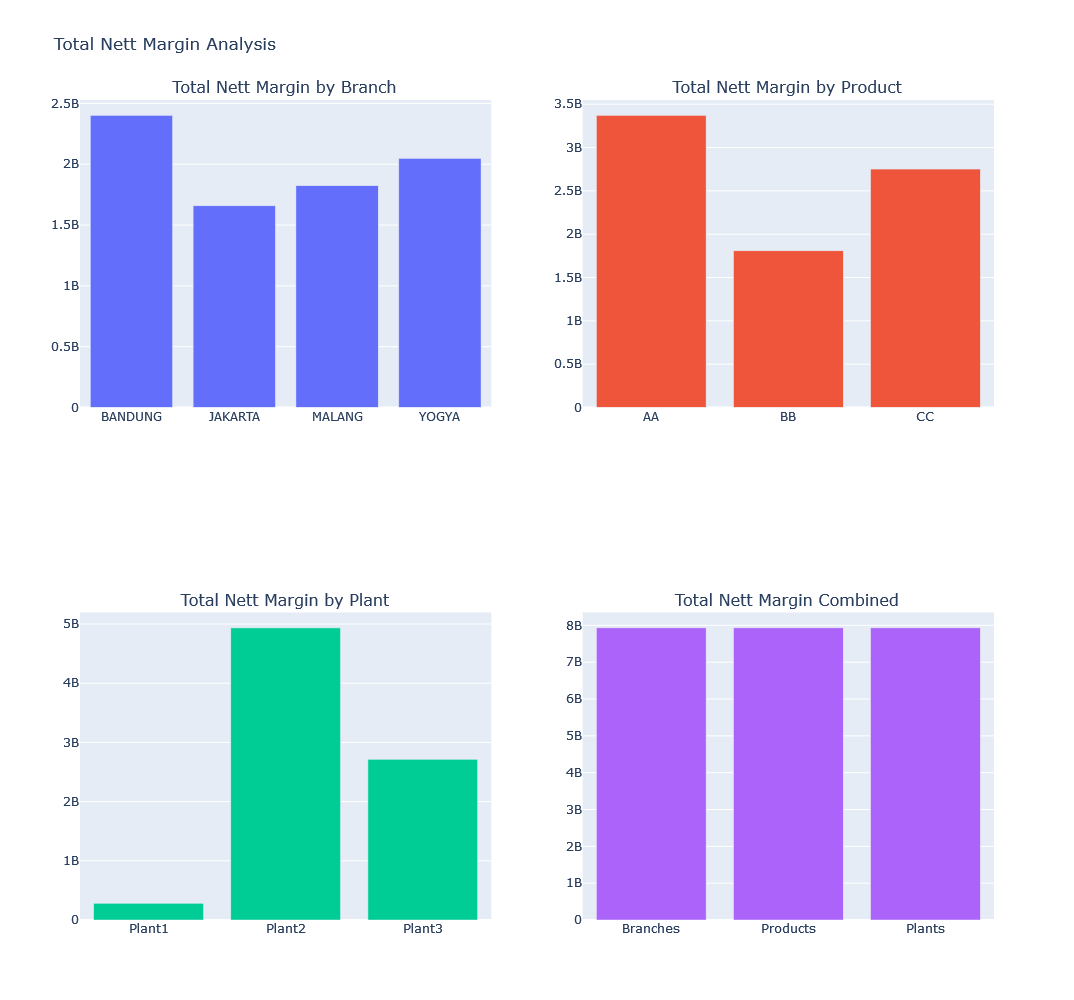

In [165]:
#create combined grand totals DataFrame
combined_grand_totals = pd.DataFrame({
    'Category': ['Branches', 'Products', 'Plants'],
    'Total Nett Margin': [branch_totals['Total Nett Margin'].sum(), product_totals['Total Nett Margin'].sum(), plant_totals['Total Nett Margin'].sum()]
})

#create subplots and bar plots to subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=('Total Nett Margin by Branch', 'Total Nett Margin by Product', 'Total Nett Margin by Plant', 'Total Nett Margin Combined'))
fig.add_trace(go.Bar(x=branch_totals['Branch'], y=branch_totals['Total Nett Margin'], name='Branch'), row=1, col=1)
fig.add_trace(go.Bar(x=product_totals['Product'], y=product_totals['Total Nett Margin'], name='Product'), row=1, col=2)
fig.add_trace(go.Bar(x=plant_totals['Plant'], y=plant_totals['Total Nett Margin'], name='Plant'), row=2, col=1)
fig.add_trace(go.Bar(x=combined_grand_totals['Category'], y=combined_grand_totals['Total Nett Margin'], name='Combined'), row=2, col=2)

#Update layout
fig.update_layout(title_text='Total Nett Margin Analysis', showlegend=False, height=1000, width=1000)
fig.show()